# **Аттестационное задание**

In [24]:
# загрузка библиотек
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# чтение таблицы
solar_data = pd.read_csv('data/solarpower.csv')
solar_data

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [11]:
# В нашем временном ряде есть несколько пропусков, они обозначены числом -1.
# Заполните пропуски средним арифметическим между двумя соседними наблюдениями:
for i in range(0,solar_data.shape[0]):
    if solar_data.iloc[i,1]==-1:
        solar_data.iloc[i,1]=(solar_data.iloc[i-1,1]+solar_data.iloc[i+1,1])/2
solar_data['cum_power'].mean().round(0)

23848.0

In [31]:
# Теперь, когда таблица заполнена, создайте столбец day_power — ежедневная выработка солнечной энергии.
# Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.
day_power = solar_data['cum_power'].diff()
solar_data["day_power"]=day_power.fillna(0)
solar_data["month_year"] = pd.to_datetime(solar_data['date']).dt.to_period("M")

grouped_by_month = solar_data.groupby(by="month_year", as_index=False)['day_power'].mean().round(0)
display(grouped_by_month.head())

,month_year,day_power
0,2017-01,3.0
1,2017-02,4.0
2,2017-03,11.0
3,2017-04,16.0
4,2017-05,19.0


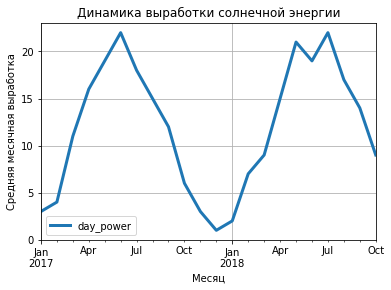

In [38]:
grouped_by_month.plot(
    kind='line', # линейный график
    x='month_year',
    y='day_power',
    title='Динамика выработки солнечной энергии',
    ylabel='Средняя месячная выработка',
    xlabel='Месяц',
    grid = True,
    lw=3
);